This phase of capstone 2 kicks-off from the the previous phase of Capstone 2 EDA. Hence the csv file exported at the end of the EDA stage is re-imported here for feature engineering, data cleaning and training data development.

Objective
 - Data Preprocessing
 - one hot encode or create dummy variables
 - Standardize
 - train test split
 - Build and evaluate the follwing type of models
  - LinearRegression
  - sm.OLS
 

In [1]:
# loading necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
pv_df = pd.read_csv('pv_regression.csv', index_col = 0)
pv_df.head()

,installation_date,Year,system_size_DC,new_construction,ground_mounted,state,installer_name,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module
0,2018-01-01,2018,10.3700,0.0,0.0,CA,Sunworks United,1.0,3.905497,18.711656,0,1,0
1,2018-01-01,2018,7.4305,0.0,0.0,CA,1st Light Energy,1.0,3.950707,16.512247,0,1,0
2,2018-01-01,2018,12.6000,0.0,0.0,CA,S E Lnstructionrporation,1.0,4.853175,20.917001,0,1,1
3,2018-01-01,2018,5.2800,0.0,0.0,CA,Sierra Pacific Home &Mfort,1.0,3.958333,19.710083,0,1,0
4,2018-01-01,2018,6.8400,0.0,0.0,CA,Syntrol Plumbing Heating & Air,1.0,4.991082,17.447199,0,1,0


In [3]:
pv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184778 entries, 0 to 184777
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   installation_date          184778 non-null  object 
 1   Year                       184778 non-null  int64  
 2   system_size_DC             184778 non-null  float64
 3   new_construction           184778 non-null  float64
 4   ground_mounted             184778 non-null  float64
 5   state                      184778 non-null  object 
 6   installer_name             184565 non-null  object 
 7   DC_optimizer               184778 non-null  float64
 8   dollar_per_watt            184778 non-null  float64
 9   Overall_Module_efficiency  184778 non-null  float64
 10  micro_inverter             184778 non-null  int64  
 11  installer_experience       184778 non-null  int64  
 12  Premium_Module             184778 non-null  int64  
dtypes: float64(6), int64(4), obje

In [4]:
pv_df['state'].value_counts()

CA    178722
MA      5751
NH       189
FL       116
Name: state, dtype: int64

In [5]:
pv_df['Premium_Module'].value_counts()

0    123182
1     61596
Name: Premium_Module, dtype: int64

In [6]:
pv_df['installer_name'].value_counts()

Tesla Energy                      17313
Sunpower Capital                   9685
Sunrun                             9185
Semper Solarisnstruction           6240
Petersen Dean                      5733
                                  ...  
Gecko Solar Energy                    1
Reuter Dukenstruction Services        1
Allright Enterprizes                  1
Humboldt Solar                        1
Highuntry Builders                    1
Name: installer_name, Length: 3034, dtype: int64

In [7]:
pv_df['DC_optimizer'].value_counts()

0.0    95861
1.0    88917
Name: DC_optimizer, dtype: int64

In [8]:
pv_df['dollar_per_watt'].value_counts()

5.120000    9659
4.250000    2410
4.500000    2025
4.500003    1304
4.000000    1243
            ... 
6.148318       1
2.924262       1
2.730492       1
4.976327       1
3.779986       1
Name: dollar_per_watt, Length: 103469, dtype: int64

A quick recap of the data frame above shows that categoriacal variables are - 
 - Installation_date
 - State
 - Installer Name
 
 Of the three we will encode the State. The installation date column was mainly used to capture the year of installation and since its actually a date_time type, it can be dropped. 
 
 Additionally the installation date and Installer name are mainly used to calculate the installer experience and have hence served their purpose.

In [9]:
pv_df1 = pv_df.drop(columns = ['installation_date','installer_name'], axis = 1)
pv_df1.head()

,Year,system_size_DC,new_construction,ground_mounted,state,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module
0,2018,10.3700,0.0,0.0,CA,1.0,3.905497,18.711656,0,1,0
1,2018,7.4305,0.0,0.0,CA,1.0,3.950707,16.512247,0,1,0
2,2018,12.6000,0.0,0.0,CA,1.0,4.853175,20.917001,0,1,1
3,2018,5.2800,0.0,0.0,CA,1.0,3.958333,19.710083,0,1,0
4,2018,6.8400,0.0,0.0,CA,1.0,4.991082,17.447199,0,1,0


In [10]:
pv_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184778 entries, 0 to 184777
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Year                       184778 non-null  int64  
 1   system_size_DC             184778 non-null  float64
 2   new_construction           184778 non-null  float64
 3   ground_mounted             184778 non-null  float64
 4   state                      184778 non-null  object 
 5   DC_optimizer               184778 non-null  float64
 6   dollar_per_watt            184778 non-null  float64
 7   Overall_Module_efficiency  184778 non-null  float64
 8   micro_inverter             184778 non-null  int64  
 9   installer_experience       184778 non-null  int64  
 10  Premium_Module             184778 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 16.9+ MB


Note here the installer experience is the substitute for installer name. 
Moving forward - we will extract the state column and create a dummy variable for the state feature, concat it back to the main dataframe and subsequently remove the original categorical featire of the state. 

In [11]:
pv_df2 = pd.get_dummies(pv_df1, drop_first = True)
pv_df2.head()

,Year,system_size_DC,new_construction,ground_mounted,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH
0,2018,10.3700,0.0,0.0,1.0,3.905497,18.711656,0,1,0,0,0,0
1,2018,7.4305,0.0,0.0,1.0,3.950707,16.512247,0,1,0,0,0,0
2,2018,12.6000,0.0,0.0,1.0,4.853175,20.917001,0,1,1,0,0,0
3,2018,5.2800,0.0,0.0,1.0,3.958333,19.710083,0,1,0,0,0,0
4,2018,6.8400,0.0,0.0,1.0,4.991082,17.447199,0,1,0,0,0,0


In [12]:
pv_df1.head()

,Year,system_size_DC,new_construction,ground_mounted,state,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module
0,2018,10.3700,0.0,0.0,CA,1.0,3.905497,18.711656,0,1,0
1,2018,7.4305,0.0,0.0,CA,1.0,3.950707,16.512247,0,1,0
2,2018,12.6000,0.0,0.0,CA,1.0,4.853175,20.917001,0,1,1
3,2018,5.2800,0.0,0.0,CA,1.0,3.958333,19.710083,0,1,0
4,2018,6.8400,0.0,0.0,CA,1.0,4.991082,17.447199,0,1,0


In [13]:
pv_df2 = pv_df2.astype({"new_construction":'int', "ground_mounted":'int', "DC_optimizer" : 'int'})
pv_df2.head()

,Year,system_size_DC,new_construction,ground_mounted,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH
0,2018,10.3700,0,0,1,3.905497,18.711656,0,1,0,0,0,0
1,2018,7.4305,0,0,1,3.950707,16.512247,0,1,0,0,0,0
2,2018,12.6000,0,0,1,4.853175,20.917001,0,1,1,0,0,0
3,2018,5.2800,0,0,1,3.958333,19.710083,0,1,0,0,0,0
4,2018,6.8400,0,0,1,4.991082,17.447199,0,1,0,0,0,0


In [14]:
pv_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184778 entries, 0 to 184777
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Year                       184778 non-null  int64  
 1   system_size_DC             184778 non-null  float64
 2   new_construction           184778 non-null  int64  
 3   ground_mounted             184778 non-null  int64  
 4   DC_optimizer               184778 non-null  int64  
 5   dollar_per_watt            184778 non-null  float64
 6   Overall_Module_efficiency  184778 non-null  float64
 7   micro_inverter             184778 non-null  int64  
 8   installer_experience       184778 non-null  int64  
 9   Premium_Module             184778 non-null  int64  
 10  state_FL                   184778 non-null  uint8  
 11  state_MA                   184778 non-null  uint8  
 12  state_NH                   184778 non-null  uint8  
dtypes: float64(3), int64(7), uint

In [15]:
pv_df2['Year'].value_counts()

2019    93266
2018    91512
Name: Year, dtype: int64

Since we are explicitly focusing on installations from the year 2018 and 2019 we can drop the Year column. 

In [16]:
pv_df2.drop(columns = 'Year', axis = 1, inplace = True)


In [17]:
pv_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184778 entries, 0 to 184777
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   system_size_DC             184778 non-null  float64
 1   new_construction           184778 non-null  int64  
 2   ground_mounted             184778 non-null  int64  
 3   DC_optimizer               184778 non-null  int64  
 4   dollar_per_watt            184778 non-null  float64
 5   Overall_Module_efficiency  184778 non-null  float64
 6   micro_inverter             184778 non-null  int64  
 7   installer_experience       184778 non-null  int64  
 8   Premium_Module             184778 non-null  int64  
 9   state_FL                   184778 non-null  uint8  
 10  state_MA                   184778 non-null  uint8  
 11  state_NH                   184778 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 14.6 MB


In [18]:
# renaming columns for ease of use
pv_df2.rename(columns = {'system_size_DC': 'kW'}, inplace = True)

In [19]:
pv_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184778 entries, 0 to 184777
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   kW                         184778 non-null  float64
 1   new_construction           184778 non-null  int64  
 2   ground_mounted             184778 non-null  int64  
 3   DC_optimizer               184778 non-null  int64  
 4   dollar_per_watt            184778 non-null  float64
 5   Overall_Module_efficiency  184778 non-null  float64
 6   micro_inverter             184778 non-null  int64  
 7   installer_experience       184778 non-null  int64  
 8   Premium_Module             184778 non-null  int64  
 9   state_FL                   184778 non-null  uint8  
 10  state_MA                   184778 non-null  uint8  
 11  state_NH                   184778 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 14.6 MB


In [20]:
# considering only the numerical columns for standardization
from sklearn.preprocessing import StandardScaler

X = pv_df2.drop(columns = 'dollar_per_watt', axis = 1)
y = pv_df2['dollar_per_watt']



In [21]:
X.head()

,kW,new_construction,ground_mounted,DC_optimizer,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH
0,10.3700,0,0,1,18.711656,0,1,0,0,0,0
1,7.4305,0,0,1,16.512247,0,1,0,0,0,0
2,12.6000,0,0,1,20.917001,0,1,1,0,0,0
3,5.2800,0,0,1,19.710083,0,1,0,0,0,0
4,6.8400,0,0,1,17.447199,0,1,0,0,0,0


In [22]:
y.head()

0    3.905497
1    3.950707
2    4.853175
3    3.958333
4    4.991082
Name: dollar_per_watt, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [24]:
X_train.head()

,kW,new_construction,ground_mounted,DC_optimizer,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH
106981,5.90,0,0,1,18.198822,0,15,0,0,0,0
77562,6.71,0,0,1,18.263473,0,93,0,0,0,0
64911,7.70,0,0,1,19.743590,0,87,0,0,0,0
36565,9.57,0,0,1,19.710083,0,54,0,0,0,0
26404,9.54,0,0,0,16.462286,1,124,0,0,0,0


In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129344 entries, 106981 to 15725
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   kW                         129344 non-null  float64
 1   new_construction           129344 non-null  int64  
 2   ground_mounted             129344 non-null  int64  
 3   DC_optimizer               129344 non-null  int64  
 4   Overall_Module_efficiency  129344 non-null  float64
 5   micro_inverter             129344 non-null  int64  
 6   installer_experience       129344 non-null  int64  
 7   Premium_Module             129344 non-null  int64  
 8   state_FL                   129344 non-null  uint8  
 9   state_MA                   129344 non-null  uint8  
 10  state_NH                   129344 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 9.3 MB


In [26]:
# extracting only numeric features in both the train set before applying standard scaler
# apply the scaler fit and transform to the X_tr dataset
X_tr = X_train[['kW', 'Overall_Module_efficiency', 'installer_experience']]

In [27]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129344 entries, 106981 to 15725
Data columns (total 3 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   kW                         129344 non-null  float64
 1   Overall_Module_efficiency  129344 non-null  float64
 2   installer_experience       129344 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 3.9 MB


In [28]:
# extracting only numeric features in the test set.
# Apply the scaler transformation to X_te
X_te = X_test[['kW', 'Overall_Module_efficiency', 'installer_experience']]

In [29]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit(X_tr) # fitting only numeric features from train dataset


In [30]:
X_tr_scaled.mean_

array([   7.26369865,   19.40001248, 1785.56053624])

In [31]:
print(X_tr_scaled)

StandardScaler()


In [32]:
X_tr_transformed = X_tr_scaled.transform(X_tr) # transforming training data set using the scaler

In [33]:
X_tr_transformed.mean(axis = 0)

array([-7.36394836e-17,  4.77709026e-16,  2.74671703e-18])

In [34]:
# transforming the test data set using the scaler created from the train data set
X_te_transformed = X_tr_scaled.transform(X_te)

In [35]:
X_te_transformed.mean(axis = 0)

array([ 5.89268800e-05, -5.56999124e-03, -2.57322367e-03])

In [36]:
# putting the transformed values in train data sset back to the original train dataset
X_train.head()

,kW,new_construction,ground_mounted,DC_optimizer,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH
106981,5.90,0,0,1,18.198822,0,15,0,0,0,0
77562,6.71,0,0,1,18.263473,0,93,0,0,0,0
64911,7.70,0,0,1,19.743590,0,87,0,0,0,0
36565,9.57,0,0,1,19.710083,0,54,0,0,0,0
26404,9.54,0,0,0,16.462286,1,124,0,0,0,0


In [37]:
X_train.loc[:, ['kW', 'Overall_Module_efficiency', 'installer_experience']] = X_tr_transformed

/Users/srijagannathan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [38]:
X_train.head()

,kW,new_construction,ground_mounted,DC_optimizer,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH
106981,-0.227901,0,0,1,-0.806933,0,-0.548542,0,0,0,0
77562,-0.092534,0,0,1,-0.763502,0,-0.524376,0,0,0,0
64911,0.072915,0,0,1,0.230808,0,-0.526235,0,0,0,0
36565,0.385429,0,0,1,0.208298,0,-0.536459,0,0,0,0
26404,0.380415,0,0,0,-1.973500,1,-0.514772,0,0,0,0


In [39]:
X_tr_transformed

array([[-0.22790129, -0.80693287, -0.54854168],
       [-0.09253411, -0.76350202, -0.52437631],
       [ 0.07291467,  0.2308076 , -0.52623518],
       ...,
       [-0.55879885, -1.42857181, -0.55009074],
       [ 0.03625741, -1.41333716, -0.40850646],
       [-0.39919927,  0.00768011,  0.04134121]])

In [40]:
X_test.loc[:, ['kW', 'Overall_Module_efficiency', 'installer_experience']] = X_te_transformed

/Users/srijagannathan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [41]:
X_test.head()

,kW,new_construction,ground_mounted,DC_optimizer,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH
93532,-0.127629,0,0,1,-2.083261,0,-0.548851,0,0,0,0
175019,-0.304776,0,0,1,0.821078,0,0.687610,1,0,0,0
52621,0.169844,0,0,0,1.797817,1,0.002924,1,0,0,0
184169,-0.055768,0,0,0,0.822919,1,-0.441037,1,0,0,0
144367,0.230007,0,1,0,1.804313,1,-0.548851,1,0,0,0


Start adding models from here.

- You have a done a 70 / 30 train test split
- You have standardized the data. 
- Use the Wine regression case study to import the necessary modules and perform regression analysis
- Build 3 models
 - DummyRegressor
 - LinearRegfression() - use cross validation
 - sm.OLS() - multilinear regression - use cross validation
 

- Use RandomForest as a model in regression analysis as well. Refer to guided capstone for that. Remember to do hyper parameter turning using GridSearchCV

 
 

In [42]:
# importing all necessary modules for regression
import statsmodels.api as sm # for OLS model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression # for linear regression model
from sklearn.ensemble import RandomForestRegressor # for random forest model

from sklearn.model_selection import cross_validate, GridSearchCV # for cross validation and hyper parameter tuning

import warnings # for handling error messages

warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.filterwarnings(action = "ignore", module = "scipy", message = "^internal gelsd")



## First Regression module using LinearRegression()

In [43]:
rModel = LinearRegression()



In [44]:
#fitting the model to the train data
rModel.fit(X_train, y_train)

LinearRegression()

In [45]:
# Evaluating the model
print(rModel.score(X_train, y_train))

0.030939317550342293


In [46]:
y_pred = rModel.predict(X_test)

Text(0, 0.5, 'Predicted values')

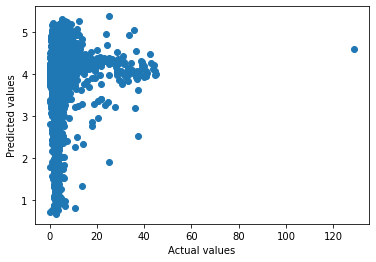

In [47]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

The scatter plot above shows that there is a value > 120. Lets have a look at that. 

In [48]:
pv_df2[pv_df2['dollar_per_watt'] > 100]

,kW,new_construction,ground_mounted,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH
31216,0.1804,0,1,0,128.874723,18.449031,1,911,0,0,0,0


In [49]:
pv_df2[(pv_df2['kW'] > 0) & (pv_df2['kW'] < 1)]

,kW,new_construction,ground_mounted,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH
627,0.988531,0,0,0,5.159173,16.561066,1,5,0,0,0,0
2100,0.988531,0,0,0,6.676576,16.561066,1,15,0,0,0,0
2229,0.990000,0,0,0,6.573737,20.015721,1,10,1,0,0,0
2250,0.981000,0,0,0,3.599388,20.052566,1,100,1,0,0,0
2906,0.988531,0,0,0,5.159173,16.561066,1,25,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
181794,0.690000,0,0,0,4.452174,21.156377,0,6129,1,0,0,0
182681,0.405000,0,0,0,2.469136,20.250000,1,36,1,0,0,0
182993,0.981000,0,0,0,4.587156,20.052566,1,6168,1,0,0,0
183021,0.990000,0,0,0,5.050505,20.625000,1,6170,1,0,0,0


Analyzing the dollar per watt for the points in the scatter plot that have a value greater than 10

In [50]:
pv_df2[pv_df2['dollar_per_watt'] > 10]

,kW,new_construction,ground_mounted,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH
125,3.52102,0,0,1,10.366314,19.635202,0,1,0,0,0,0
301,1.65000,0,0,0,10.377576,16.965004,1,1,0,0,0,0
527,1.68000,0,0,0,18.683333,17.273459,1,3,0,0,0,0
538,1.68000,0,0,0,10.080952,17.273459,1,4,0,0,0,0
641,3.30000,0,0,1,10.498848,19.635202,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
184121,2.59000,0,0,0,11.447876,22.112259,1,106,1,0,0,0
184145,4.20000,0,0,1,12.095238,21.228795,0,335,1,0,0,0
184462,8.88000,0,0,0,31.503378,22.112259,1,39,1,0,0,0
184743,24.00000,0,0,0,16.355785,17.910875,0,10,0,0,0,0


Seems like the more expensive systems also tend to have a bigger system size. Lets do a scater plot of that to see what we get. 

Text(0, 0.5, 'Dollar per Watt')

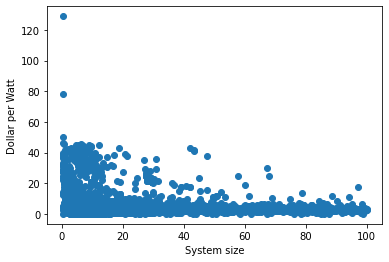

In [51]:
plt.scatter(pv_df2['kW'], pv_df2['dollar_per_watt'])
plt.xlabel('System size')
plt.ylabel('Dollar per Watt')

The plot above compels us to look at the data with a fresh perspective. 
- For lower system sizes( closer to zero) a cost of 80 and 120 seems almost like outliers. We can consider removing those points. 
- In the initial part of the curve, the cost seems to have a non linear variation with the system size. Hence it will be useful to include a square term of the system size as well. 
- As the system size increases the cost tends to plateau towards a value between 0 to 10. 
- For a majority of the system installations the price seems to be fairly constant and in the range of `$0-$10` per watt.

In [52]:
# removing outliers from the data set
pv_df2 = pv_df2[pv_df2['dollar_per_watt'] < 80]

Text(0, 0.5, 'Dollar per Watt')

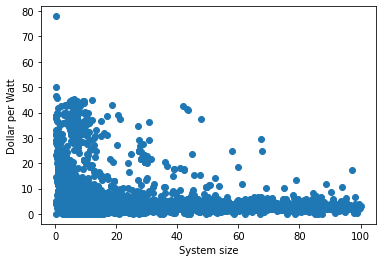

In [53]:
plt.scatter(pv_df2['kW'], pv_df2['dollar_per_watt'])
plt.xlabel('System size')
plt.ylabel('Dollar per Watt')

In [54]:
# removing outliers from the data set
pv_df2 = pv_df2[pv_df2['dollar_per_watt'] < 70]

Text(0, 0.5, 'Dollar per Watt')

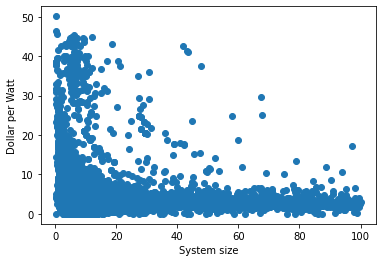

In [55]:
plt.scatter(pv_df2['kW'], pv_df2['dollar_per_watt'])
plt.xlabel('System size')
plt.ylabel('Dollar per Watt')

In [56]:
# adding a square term in the data set
pv_df2['kW2'] = pv_df2['kW'] **2

In [57]:
pv_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184776 entries, 0 to 184777
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   kW                         184776 non-null  float64
 1   new_construction           184776 non-null  int64  
 2   ground_mounted             184776 non-null  int64  
 3   DC_optimizer               184776 non-null  int64  
 4   dollar_per_watt            184776 non-null  float64
 5   Overall_Module_efficiency  184776 non-null  float64
 6   micro_inverter             184776 non-null  int64  
 7   installer_experience       184776 non-null  int64  
 8   Premium_Module             184776 non-null  int64  
 9   state_FL                   184776 non-null  uint8  
 10  state_MA                   184776 non-null  uint8  
 11  state_NH                   184776 non-null  uint8  
 12  kW2                        184776 non-null  float64
dtypes: float64(4), int64(6), uint

In [58]:
pv_df2.head()

,kW,new_construction,ground_mounted,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH,kW2
0,10.3700,0,0,1,3.905497,18.711656,0,1,0,0,0,0,107.53690
1,7.4305,0,0,1,3.950707,16.512247,0,1,0,0,0,0,55.21233
2,12.6000,0,0,1,4.853175,20.917001,0,1,1,0,0,0,158.76000
3,5.2800,0,0,1,3.958333,19.710083,0,1,0,0,0,0,27.87840
4,6.8400,0,0,1,4.991082,17.447199,0,1,0,0,0,0,46.78560


In [59]:
# re-iterating the steps for the train test split and standardization
X = pv_df2.drop(columns = 'dollar_per_watt', axis = 1)
y = pv_df2['dollar_per_watt']

In [60]:
X.head()

,kW,new_construction,ground_mounted,DC_optimizer,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH,kW2
0,10.3700,0,0,1,18.711656,0,1,0,0,0,0,107.53690
1,7.4305,0,0,1,16.512247,0,1,0,0,0,0,55.21233
2,12.6000,0,0,1,20.917001,0,1,1,0,0,0,158.76000
3,5.2800,0,0,1,19.710083,0,1,0,0,0,0,27.87840
4,6.8400,0,0,1,17.447199,0,1,0,0,0,0,46.78560


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

The first model we will test is the dummy regressor. The Dummy Regressor will try to see good of a fit is the mean to the data. 

In [62]:
# importing the Dummy Regressor module
from sklearn.dummy import DummyRegressor

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129343 entries, 82851 to 15725
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   kW                         129343 non-null  float64
 1   new_construction           129343 non-null  int64  
 2   ground_mounted             129343 non-null  int64  
 3   DC_optimizer               129343 non-null  int64  
 4   Overall_Module_efficiency  129343 non-null  float64
 5   micro_inverter             129343 non-null  int64  
 6   installer_experience       129343 non-null  int64  
 7   Premium_Module             129343 non-null  int64  
 8   state_FL                   129343 non-null  uint8  
 9   state_MA                   129343 non-null  uint8  
 10  state_NH                   129343 non-null  uint8  
 11  kW2                        129343 non-null  float64
dtypes: float64(3), int64(6), uint8(3)
memory usage: 10.2 MB


Given that all the fields in the data set are either int or float, we can go ahead and do a Dummy Regressor

In [64]:
train_mean = y_train.mean()
train_mean

4.113054173305983

In [65]:
# Fitting a dummy regressor to the training data set
dumb_reg = DummyRegressor(strategy = 'mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[4.11305417]])

Evaluting the metrics on this model

In [66]:
# fitst we predict the y from the model we just fit
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([4.11305417, 4.11305417, 4.11305417, 4.11305417, 4.11305417])

The Dummy Regressor basically predicts the output of every row in the test set to be the mean. We will now see how good of a fit is this model through evaulation metrics

In [67]:
# r2_score
r2_score(y_train, y_tr_pred)

0.0

In [68]:
# evaluating dummy regressor for the test data set
y_te_pred = train_mean * np.ones(len(y_test))
r2_score(y_test, y_te_pred)

-6.819575928407318e-06

In [69]:
# using the MAE as the metric
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.9490989230457746, 0.945867731507576)

In [70]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(2.9570179977289985, 2.936545553297205)

Moving forward we will evaluate the performance of a Linear Regressor model

In [71]:
# making a pipeline
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), 
                    LinearRegression()
                    )

In [72]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [73]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [74]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.044712828561916496, 0.041829572858623654)

In [75]:
mean_absolute_error(y_test, y_te_pred)

0.888813332809098

In [76]:
mean_squared_error(y_test, y_te_pred)

2.8136919189372125

Text(0, 0.5, 'Predicted values')

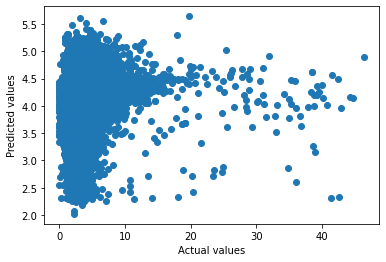

In [77]:
plt.scatter(y_test, y_te_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Analyzing the model with k best features

In [78]:
# importing K best features
from sklearn.feature_selection import SelectKBest, f_regression

# making a pipeline using K Best features
pipe1 = make_pipeline(StandardScaler(), 
                     SelectKBest(f_regression),
                     LinearRegression()
                     )

pipe1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7f80c84c01f0>)),
                ('linearregression', LinearRegression())])

In [79]:
y_tr_pred = pipe1.predict(X_train)
y_te_pred = pipe1.predict(X_test)

In [80]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.042976397727498505, 0.040768280527985534)

The model performance of this model is worse than before. Here however K best defaults to 10. 
Trying next assessing model performance using cross validation. We will assess the performance of the first pipeline model that includes all features. 

In [81]:
# importing cross validation and then assessing performance
from sklearn.model_selection import cross_validate
cv_results = cross_validate(pipe, X_train, y_train, cv = 5)

In [82]:
cv_scores = cv_results['test_score']
cv_scores

array([0.04370594, 0.04717901, 0.04655195, 0.04604088, 0.03832396])

Cross validartion shows that the best we get is a value of 0.047. 

Next we will assess performance using Grid Search CV. We will tune the hyper parameter of k used as a part of the k best features.


In [83]:
k = [k + 1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k' : k}

In [84]:
lr_grid_cv = GridSearchCV(pipe1, param_grid = grid_params, cv = 5, n_jobs = -1)

In [85]:
lr_grid_cv.fit(X_train, y_train)

/Users/srijagannathan/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f80c84c01f0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12]})

In [86]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_mean

array([0.01816966, 0.02969171, 0.04149497, 0.041689  , 0.04215155,
       0.0422691 , 0.04228606, 0.04266639, 0.04276142, 0.04355997,
       0.04369432, 0.04436035])

In [87]:
lr_grid_cv.best_params_

{'selectkbest__k': 12}

Text(0.5, 1.0, 'Pipeline mean CV score (error bars + / - 1sd)')

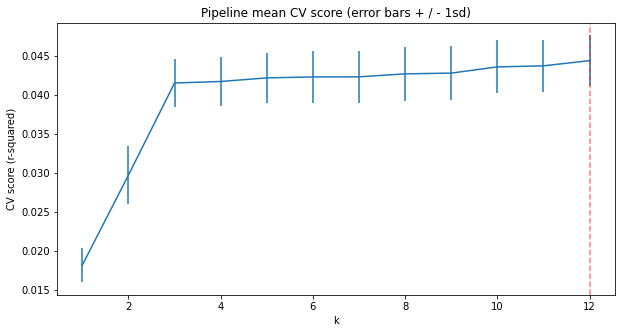

In [88]:
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]
score_std = lr_grid_cv.cv_results_['std_test_score']
best_k = lr_grid_cv.best_params_['selectkbest__k']

# plotting cross validation scores as a variation of k best features in the grid search CV model
plt.subplots(figsize = (10, 5))
plt.errorbar(cv_k, score_mean, yerr = score_std)
plt.axvline(x = best_k, c= 'r', ls = '--', alpha = 0.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars + / - 1sd)')

Since k = 12 we can conclude that all features were useful. Next we will look at the coefficients of the linear model

In [89]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns
pd.Series(coefs, index = features).sort_values(ascending = False)

kW2                          0.419280
installer_experience         0.158507
ground_mounted               0.056695
state_MA                    -0.003163
Premium_Module              -0.008835
Overall_Module_efficiency   -0.009491
state_NH                    -0.011452
state_FL                    -0.018623
new_construction            -0.049314
DC_optimizer                -0.053560
micro_inverter              -0.068235
kW                          -0.605720
dtype: float64

The model analysis above shows that the squared of kw, installer experience, and ground mounting of a system have a positive efect on the price. Hence the dollar per watt will increase with an increase in any of these values. Likewise more efficient the module lower the price of per kW of solar energy. Similary having technologies such as DC_optimizers and micro_inverters has reduced the price. This might be a little counter-intuitive as Mofdule level power electronics has an initial higher cost due to more hardware. It can be that over time the savings offset the costs. Likewise an increase in module efficiency tends to reduce the cost which makes sense. 

While the above model has an r2 score 0f 0.04, future analysis can be done to try and improve on the model performance by probaly adding more feaures into the dataset.That might help in explaining more of the price variance. The above scores essentially shows that the given features in the data set explain about 4 % of the price variance.

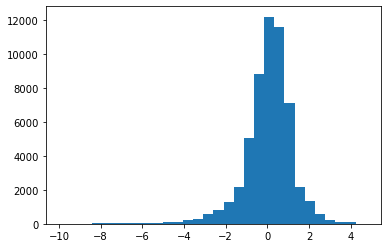

In [90]:
residual  = y_te_pred - y_test
plt.hist(residual[residual > -10], bins = 30);

In [93]:
r2_score(y_test, y_te_pred)

0.040768280527985534

Re- building another model without standardizing- 

In [94]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [95]:
rModel = LinearRegression()
grid_params = {'fit_intercept' : [True, False], 'normalize': [True, False], 'copy_X' : [True, False]}
gridModel = GridSearchCV(rModel, param_grid = grid_params, cv = 5)
gridModel.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [96]:
print(gridModel.best_score_)

0.04436034675231051


In [97]:
X_train.head()

,kW,new_construction,ground_mounted,DC_optimizer,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module,state_FL,state_MA,state_NH,kW2
82851,6.785,0,0,1,18.169500,0,69,0,0,0,0,46.036225
106983,5.760,0,0,0,21.514630,1,143,1,0,0,0,33.177600
77563,10.695,0,0,0,21.156377,1,231,1,0,0,0,114.383025
64912,4.680,0,0,1,18.404155,0,347,0,0,0,0,21.902400
36566,9.570,0,0,1,17.313846,0,48,0,0,0,0,91.584900


### Analyzing performance usinga Random Forest Model

In [98]:
# creating a pipeline with RandomForest Regressor
RF_pipe = make_pipeline(StandardScaler(), 
                       RandomForestRegressor(random_state = 47))

In [99]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv = 5)

In [100]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.14525402, 0.12365155, 0.15301162, 0.07639037, 0.11815611])

Random Forest model has in improved perfomance it appears! 

In [101]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.12329273421204301, 0.026802446395218924)

## Hyperparameter tuning for the Random Forest model using Grid Search CV

Here we will explore the performance of the Random Forest Model through a different number of trees. 

In [104]:
# settings up the grid parameters to be passed to the RF pipeline
n_est = [int(n) for n in range(100,300,70)]

grid_params = {
    'randomforestregressor__n_estimators' : n_est
    
}

In [105]:
n_est

[100, 170, 240]

In [106]:
# calling the GridSearch CV method on the RF pipeline created above, with hyparameters as set in previous cell.
rf_grid_cv = GridSearchCV(RF_pipe, param_grid = grid_params, cv = 5, n_jobs = -1)

In [107]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [100, 170,
                                                                 240]})

In [108]:
rf_grid_cv.best_params_


{'randomforestregressor__n_estimators': 240}

In [109]:
rf_grid_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=240, random_state=47))])

In [110]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv = 5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.14699085, 0.13027437, 0.16118252, 0.07903902, 0.12239233])

In [111]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.12797581913445405, 0.02791245453105127)

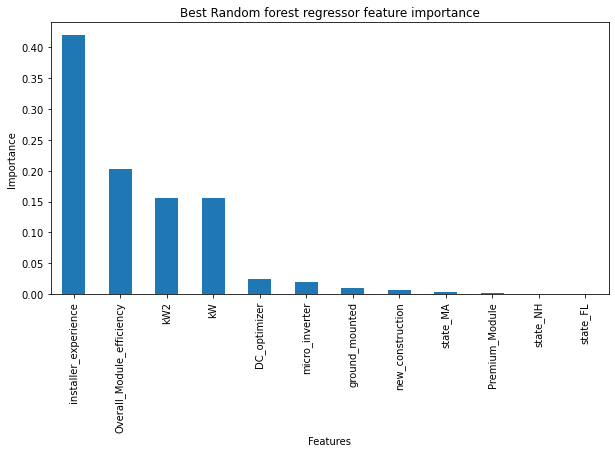

In [112]:
# plotting the feature importances
plt.subplots(figsize = (10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index = X_train.columns).sort_values(ascending = False)
rf_feat_imps.plot(kind = 'bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Best Random forest regressor feature importance');

We can see that the top 4 dominant features are 

 - Installer experience
 - Overall Module Efficiency
 - kW2
 - kW
 
The relative importance of two of the features for the Random Forest Model is different from the Linear Regression model namely - Installer experience and Overall Module Efficiency.

Looking at the cross validation scores above we can conclude that the Random Forest Regressor with n_estoimators  = 240 gives the best performance and we can select that as the best model for this data set.